# 1. Importing Libraries


In [56]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, root_mean_squared_error,  r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading and Exploring the Data

In [57]:
df = pd.read_csv('data/BostonHousing.csv')

In [58]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

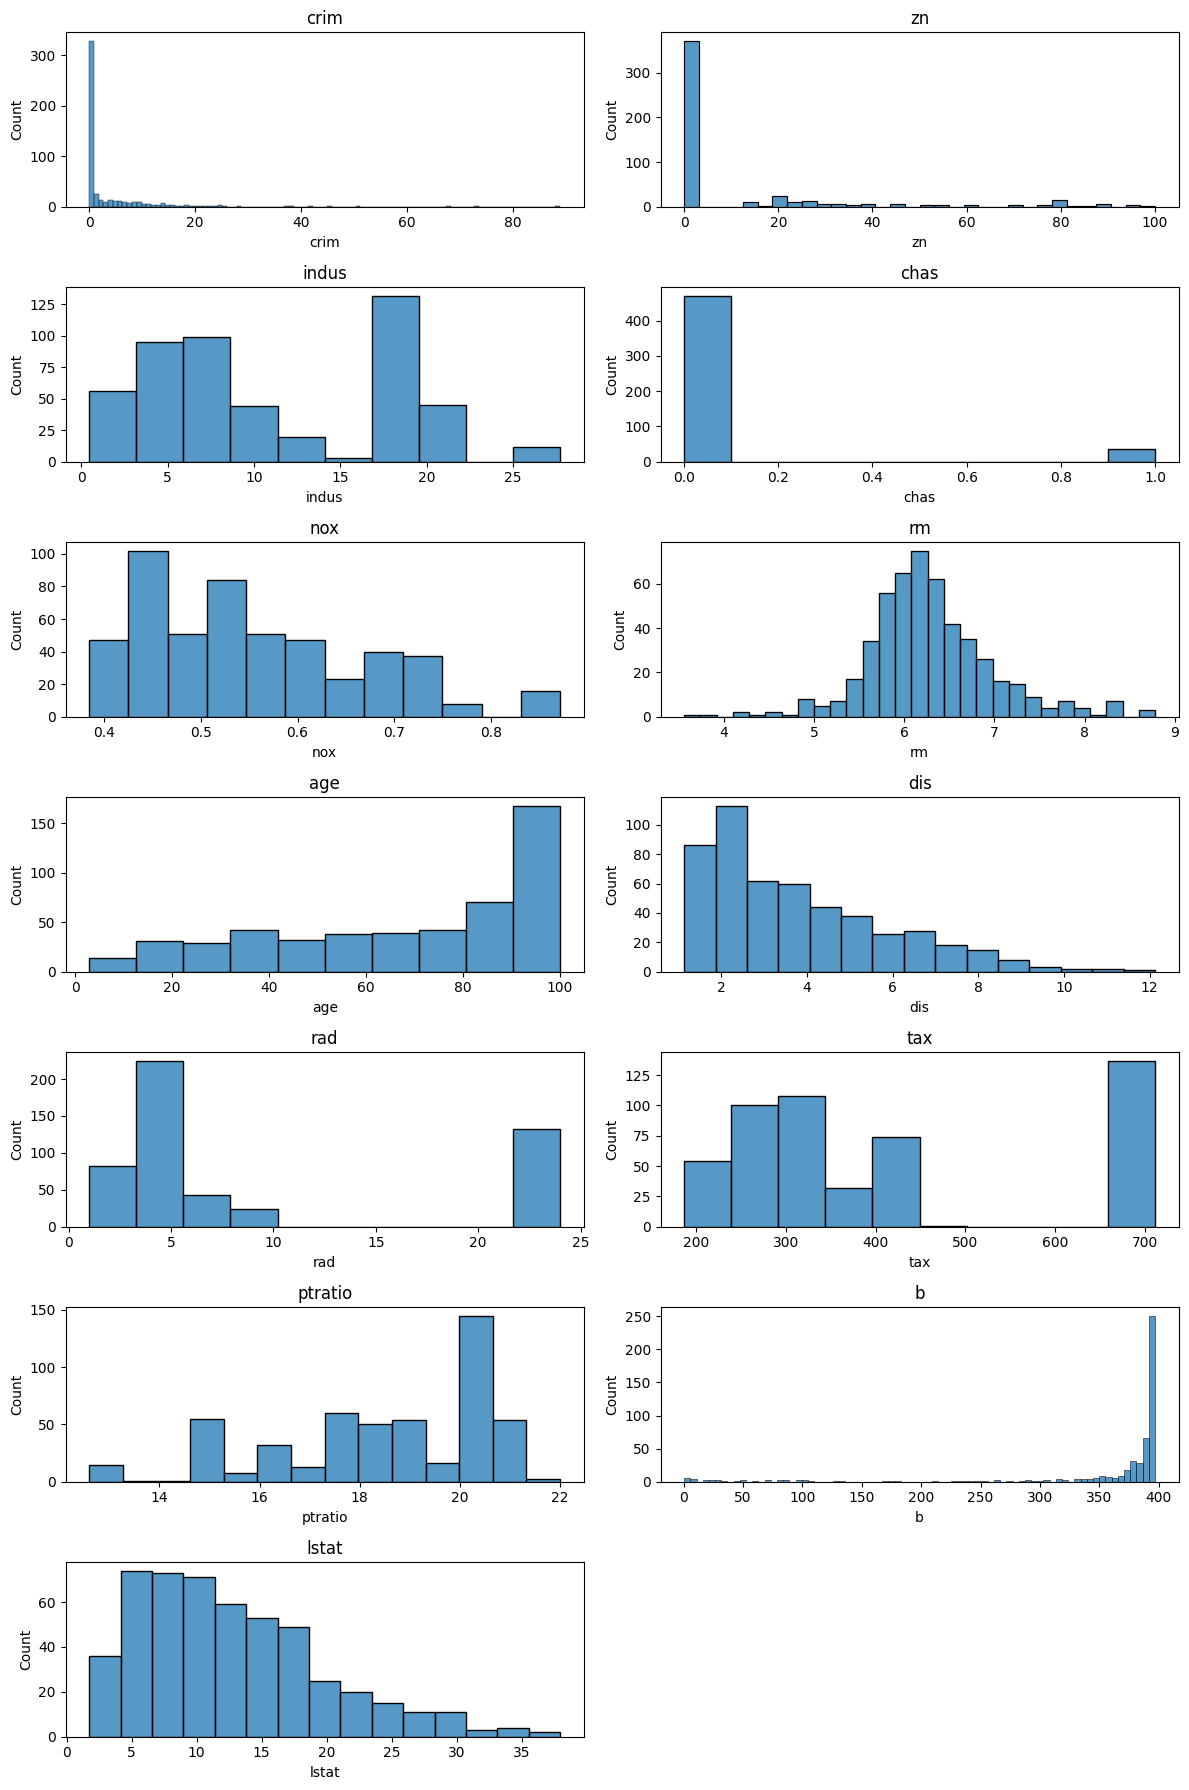

In [59]:
columnas = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
plt.figure(figsize=(12, 18))

for i, col in enumerate(columnas, 1):
    plt.subplot(len(columnas) // 2 + len(columnas) % 2, 2, i)
    sns.histplot(df[col].dropna(), kde=False)
    plt.title(col)

plt.tight_layout()
plt.show()

# 3. Data Cleaning and Preparation

In [60]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:
df.corr()['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

In [99]:
best_features = [a for a, b in df.corr()['medv'].items() if abs(b) >= 0.4]

When I run with all df features the model does not perform well so I applied a feature_importance on the first build and extracted the worst 6 features

In [100]:
df = df[best_features]

# 4. Scaling or Normalizing Data


# 5. Model Building and Training


In [105]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='medv'), df['medv'],test_size=0.2)

In [106]:
model_1 = DecisionTreeRegressor(criterion='poisson',min_samples_split=50)

model_1.fit(x_train, y_train)
predictions_1 = model_1.predict(x_test)

# 6. Model Evaluation

In [107]:
mean_squared_error(y_test, predictions_1)

13.248579539673548

In [108]:
r2_score(y_test, predictions_1)

0.8201219554285535